In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [135]:
data = pd.read_csv("1601384279_9602122_iris_new_data.txt", sep=' ', names=['sepal_len','sepal_wid','petal_len','petal_wid'])
data

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
145,4.5,2.3,1.3,0.3
146,6.0,2.2,5.0,1.5
147,6.2,2.2,4.5,1.5
148,6.0,2.2,4.0,1.0


In [136]:
data = normalize(data)
data

,sepal_len,sepal_wid,petal_len,petal_wid
0,0.388889,1.000000,0.084746,0.125000
1,0.333333,0.916667,0.067797,0.041667
2,0.250000,0.875000,0.084746,0.000000
3,0.416667,0.833333,0.033898,0.041667
4,0.305556,0.791667,0.118644,0.125000
...,...,...,...,...
145,0.055556,0.125000,0.050847,0.083333
146,0.472222,0.083333,0.677966,0.583333
147,0.527778,0.083333,0.593220,0.583333
148,0.472222,0.083333,0.508475,0.375000


In [137]:
# Applying PCA for dimensionality reduction
pca = PCA().fit(data)
features = range(pca.n_components_)
features
type(features)

range

In [138]:
# finding optimum number of principal components based on variance threshold
variance_boy = 0.95
y_interp = np.interp(variance_boy, pca.explained_variance_ratio_.cumsum(), np.arange(1,5,step=1))
print(y_interp)

1.9254739541134245


Text(0, 0.5, 'variance %')

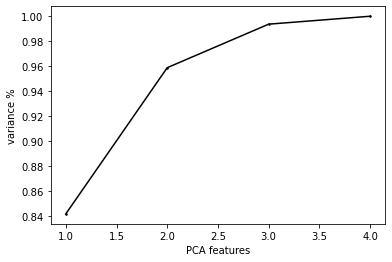

In [139]:
plt.plot(np.arange(1,5,step=1), pca.explained_variance_ratio_.cumsum(), color = 'black', marker = '.', markersize = 3)
# plt.plot([y_interp]*4, pca.explained_variance_ratio_.cumsum(), color = 'red')
# plt.plot(features, [variance_boy]*4, color = 'blue')

plt.xlabel('PCA features')
plt.ylabel('variance %')

In [140]:
# PCA
pca = PCA(n_components=int(np.ceil(y_interp)))
principalComponents = pca.fit_transform(data)

data = pd.DataFrame(principalComponents)
data.shape
data

,0,1
0,-0.549943,0.518968
1,-0.625726,0.422207
2,-0.671581,0.348802
3,-0.598993,0.384079
4,-0.534057,0.293223
...,...,...
145,-0.611679,-0.410339
146,0.281323,-0.318538
147,0.252738,-0.289698
148,0.042174,-0.305310


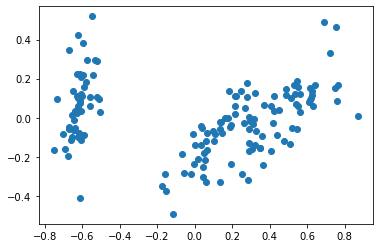

In [141]:
plt.scatter(data[:][0], data[:][1])
# plt.scatter([final_centroids[:, 0]], [final_centroids[:, 1]], c='black', alpha=1)

In [40]:
# # Feature Analysis

# plt.scatter(data.iloc[:,0], data.iloc[:,1])
# plt.show()
# # plt.scatter(data['sepal_len'], data['petal_wid'])
# # plt.scatter(data['petal_len'], data['sepal_wid'])
# # plt.scatter(data['petal_len'], data['petal_wid'])

In [42]:
# plt.scatter(data.iloc[:,0], data.iloc[:,2])
# plt.show()

In [43]:
# plt.scatter(data.iloc[:,2], data.iloc[:,1])
# plt.show()

In [44]:
# plt.scatter(data.iloc[:,2], data.iloc[:,3])
# plt.show()

In [45]:
# data = data[['petal_len','petal_wid']]
# data

In [142]:
data.isnull().sum()

0    0
1    0
dtype: int64

In [124]:
# normalization
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [125]:
data = normalize(data)
data.iloc[3]

0    0.082858
1    0.929993
Name: 3, dtype: float64

In [143]:
from sklearn.metrics.pairwise import euclidean_distances

In [156]:
def initialize_centroids(data, k):
    # no of attributes
    n = np.shape(data)[1]    
    
    # initialize centroids as zero matrices    
    centroids = np.mat(np.zeros((k,n)))    
    
    # choose random centroids
    for j in range(k):
        centroids[j,:] = data.iloc[np.random.randint(np.shape(data)[0])]
        
    return centroids

In [164]:
init_centroids = initialize_centroids(data, k=3)
print(init_centroids)
np.isnan(init_centroids).any()

[[ 0.14444377 -0.07600114]
 [ 0.3218199  -0.14037638]
 [-0.00863477 -0.0852503 ]]


False

In [160]:
import scipy.spatial.distance as metric

In [147]:
def euclidean_dist(A, B):
    
    return metric.euclidean(A, B)

In [148]:
euclidean_dist(init_centroids[0], init_centroids[1])

1.181616701740122

In [149]:
def kmeans(data, k):

    # Number of rows in dataset
    m = np.shape(data)[0]

    # Hold the instance cluster assignments
    cluster_assignments = np.mat(np.zeros((m, 2)))

    # Initialize centroids
    cents = initialize_centroids(data, k)
    
    # Preserve original centroids
    cents_orig = cents.copy()
    
    changed = True
    num_iter = 0

    # Loop until no changes to cluster assignments
    while changed:

        changed = False

        # For every instance (row in dataset)
        for i in range(m):

            # Track minimum distance, and vector index of associated cluster
            min_dist = np.inf
            min_index = -1

            # Calculate distances
            for j in range(k):

                dist_ji = euclidean_dist(cents[j,:], data.iloc[i,:])
                if dist_ji < min_dist:
                    min_dist = dist_ji
                    min_index = j

            # Check if cluster assignment of instance has changed
            if cluster_assignments[i, 0] != min_index: 
                changed = True

            # Assign instance to appropriate cluster
            cluster_assignments[i, :] = min_index, min_dist**2

        # Update centroid location
        for p in range(k):
            indices = [i for i, x in enumerate(cluster_assignments) if x[0,0] == int(p)]
            cents[p] = np.mean(data.iloc[indices], axis=0)
            
        # Count iterations
        num_iter += 1
        print(cents)

    # Return important stuff when done
    return cents, cluster_assignments, num_iter, cents_orig

In [150]:
final_centroids, cluster_ass, iterno, original_centroids = kmeans(data, k=3)
array = np.squeeze(np.asarray(cluster_ass[:,0])).astype(np.int64) + 1
array

<class 'numpy.ndarray'>
0   -0.752700
1   -0.166745
Name: 92, dtype: float64
[[ 0.35067643 -0.00336999]
 [-0.61806225  0.07852742]
 [-0.11598442 -0.32223137]]
[[ 0.39799916  0.02092437]
 [-0.61793459  0.0687501 ]
 [-0.00669113 -0.23043662]]
[[ 0.43863655  0.0448845 ]
 [-0.61793459  0.0687501 ]
 [ 0.04569942 -0.19529594]]
[[ 0.45785759  0.05265746]
 [-0.61793459  0.0687501 ]
 [ 0.06604102 -0.17637545]]
[[ 0.46495032  0.06443004]
 [-0.61793459  0.0687501 ]
 [ 0.08450391 -0.17655798]]
[[ 0.47186532  0.0687887 ]
 [-0.61793459  0.0687501 ]
 [ 0.0930327  -0.17112699]]
[[ 0.48043115  0.07894964]
 [-0.61793459  0.0687501 ]
 [ 0.10768364 -0.16740838]]
[[ 0.48920594  0.08195087]
 [-0.61793459  0.0687501 ]
 [ 0.11370876 -0.16039479]]
[[ 0.49521009  0.08083617]
 [-0.61793459  0.0687501 ]
 [ 0.11512275 -0.15428877]]
[[ 0.49521009  0.08083617]
 [-0.61793459  0.0687501 ]
 [ 0.11512275 -0.15428877]]


array([2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3])

In [151]:
ans = array.copy()

In [152]:
#             print(indices)
#             centroid_test = np.mean(data[indices], axis = 1)
#             print(centroid_test)

In [153]:
ans

array([2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3])

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=101, algorithm='full')
ans = model.fit_predict(data)
print(ans)

In [ ]:
model.inertia_

In [ ]:
# to adjust the label size
ans = ans + 1

In [ ]:
ans

In [154]:
len(ans)

150

In [155]:
with open('iris_pred_values_pca.txt', 'w') as filehandle:
    for listitem in ans:
        filehandle.write('%s\n' % listitem)
    print("Wrote",len(ans),"items successfully to iris_pred_values_pca.txt")

Wrote 150 items successfully to iris_pred_values_pca.txt
